<a href="https://colab.research.google.com/github/lucaskydelima/Optimization-with-Python-Pyomo/blob/main/S6Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyomo

In [3]:
import os
import math
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
from pyomo.environ import *

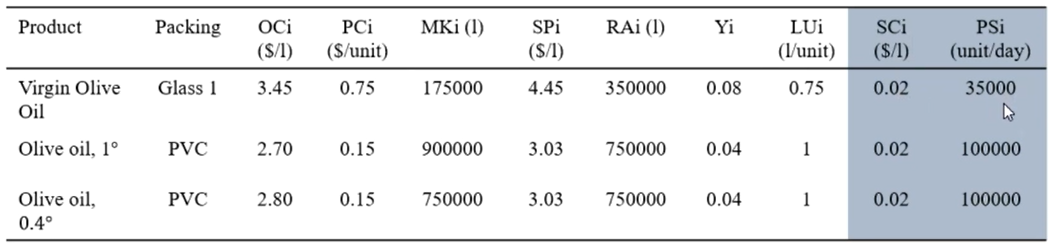

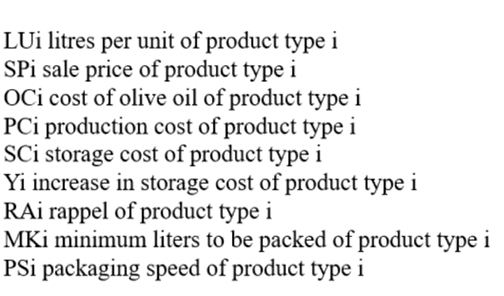

In [9]:
# Defining the model

model = pyo.ConcreteModel()

# Sets
model.i = pyo.Set(initialize=['VOil', 'Oil1', 'Oil0.4'])
model.j = pyo.Set(initialize=model.i)

# Params
model.LU = pyo.Param(model.i, initialize={'VOil': 0.75, 'Oil1': 1, 'Oil0.4': 1})
LU = model.LU
model.SP = pyo.Param(model.i, initialize={'VOil': 4.45, 'Oil1': 3.03, 'Oil0.4': 3.03})
SP = model.SP
model.OC = pyo.Param(model.i, initialize={'VOil': 3.45, 'Oil1': 2.70, 'Oil0.4': 2.80})
OC = model.OC
model.PC = pyo.Param(model.i, initialize={'VOil': 0.75, 'Oil1': 0.15, 'Oil0.4': 0.15})
PC = model.PC
model.SC = pyo.Param(model.i, initialize={'VOil': 0.02, 'Oil1': 0.02, 'Oil0.4': 0.02})
SC = model.SC
model.Y = pyo.Param(model.i, initialize={'VOil': 0.08, 'Oil1': 0.04, 'Oil0.4': 0.04})
Y = model.Y
model.RA = pyo.Param(model.i, initialize={'VOil': 350000, 'Oil1': 750000, 'Oil0.4': 750000})
RA = model.RA
model.MK = pyo.Param(model.i, initialize={'VOil': 175000, 'Oil1': 900000, 'Oil0.4': 750000})
MK = model.MK
model.PS = pyo.Param(model.i, initialize={'VOil': 35000, 'Oil1': 100000, 'Oil0.4': 100000})
PS = model.PS

# Decision Variable

model.x = pyo.Var(model.i, domain=pyo.NonNegativeIntegers)
x = model.x

# Objective Function
def Objective_rule(model, i):
  return sum(x[i]*LU[i]*(SP[i] - (x[i]*LU[i]/(100*RA[i]))) for i in model.i) - sum(x[i]*LU[i]*OC[i] for i in model.i) - sum(x[i]*PC[i] for i in model.i) - sum(x[i]*LU[i]*SC[i]*(1+Y[i]*(x[i]*LU[i]/sum(x[j]*LU[j] for j in model.j))) for i in model.i)

model.obj = pyo.Objective(rule=Objective_rule, sense=pyo.maximize)

def Constraint_1(model, i):
  return sum(x[i]/PS[i] for i in model.i) <= 20

model.const1 = pyo.Constraint(model.i, rule=Constraint_1)

def Constraint_2(model, i):
  return x[i]*LU[i] >= MK[i]

model.const2 = pyo.Constraint(model.i, rule=Constraint_2)

# Solve

os.environ['NEOS_EMAIL'] = 'lucaskydelima@gmail.com'
solver_manager = pyo.SolverManagerFactory('neos')
results = solver_manager.solve(model, opt='ipopt')

print(results)
print('Objective function = ', model.obj())
for i in model.i:
  print('Units of', i, 'produced =', x[i]())


  - termination condition: infeasible
  - message from solver: Ipopt 3.14.5\x3a Converged to a locally infeasible point. Problem may be infeasible.



Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: warning
  Message: Ipopt 3.14.5\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function =  165696.50683483345
Units of VOil produced = 233333.33320009662
Units of Oil1 produced = 899999.9999002771
Units of Oil0.4 produced = 749999.9999002771
